# 📊 01 – Exploratory Data Analysis (EDA)

This notebook performs initial exploration of the churn dataset to:
- Understand feature distributions
- Identify class imbalance
- Reveal feature-target relationships
- Prepare clean data for modeling

---

In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

## 🔍 Load Data

In [3]:
DATA_PATH = '../data/raw/telco_churn.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST_00000,Male,0,Yes,No,63,Yes,No phone service,No,No internet service,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),62.78,3995.97,Yes
1,CUST_00001,Female,0,No,No,36,Yes,Yes,Fiber optic,No internet service,Yes,No internet service,No internet service,No,No internet service,Two year,Yes,Mailed check,89.49,3315.89,No
2,CUST_00002,Male,0,No,No,32,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No internet service,Month-to-month,Yes,Mailed check,106.71,3450.44,No
3,CUST_00003,Male,1,No,Yes,24,Yes,No phone service,Fiber optic,No,No,No internet service,No,Yes,No internet service,Month-to-month,No,Credit card (automatic),33.82,879.91,Yes
4,CUST_00004,Male,0,No,Yes,2,Yes,No,No,No,No,No internet service,No internet service,No,No internet service,Month-to-month,No,Electronic check,85.40,83.94,Yes


## 🧾 Data Dictionary
Include a markdown cell here describing your dataset features, e.g.,
- `tenure`: Number of months the customer has stayed
- `MonthlyCharges`: The amount charged per month
- `Churn`: Whether the customer left in the last month

## 🧹 Missing Values & Duplicates

In [4]:
print('Shape:', df.shape)
df.duplicated().sum(), df.isna().sum().sort_values(ascending=False).head()

Shape: (50000, 21)


(0,
 customerID          0
 DeviceProtection    0
 TotalCharges        0
 MonthlyCharges      0
 PaymentMethod       0
 dtype: int64)

## 📊 Numerical Feature Distributions

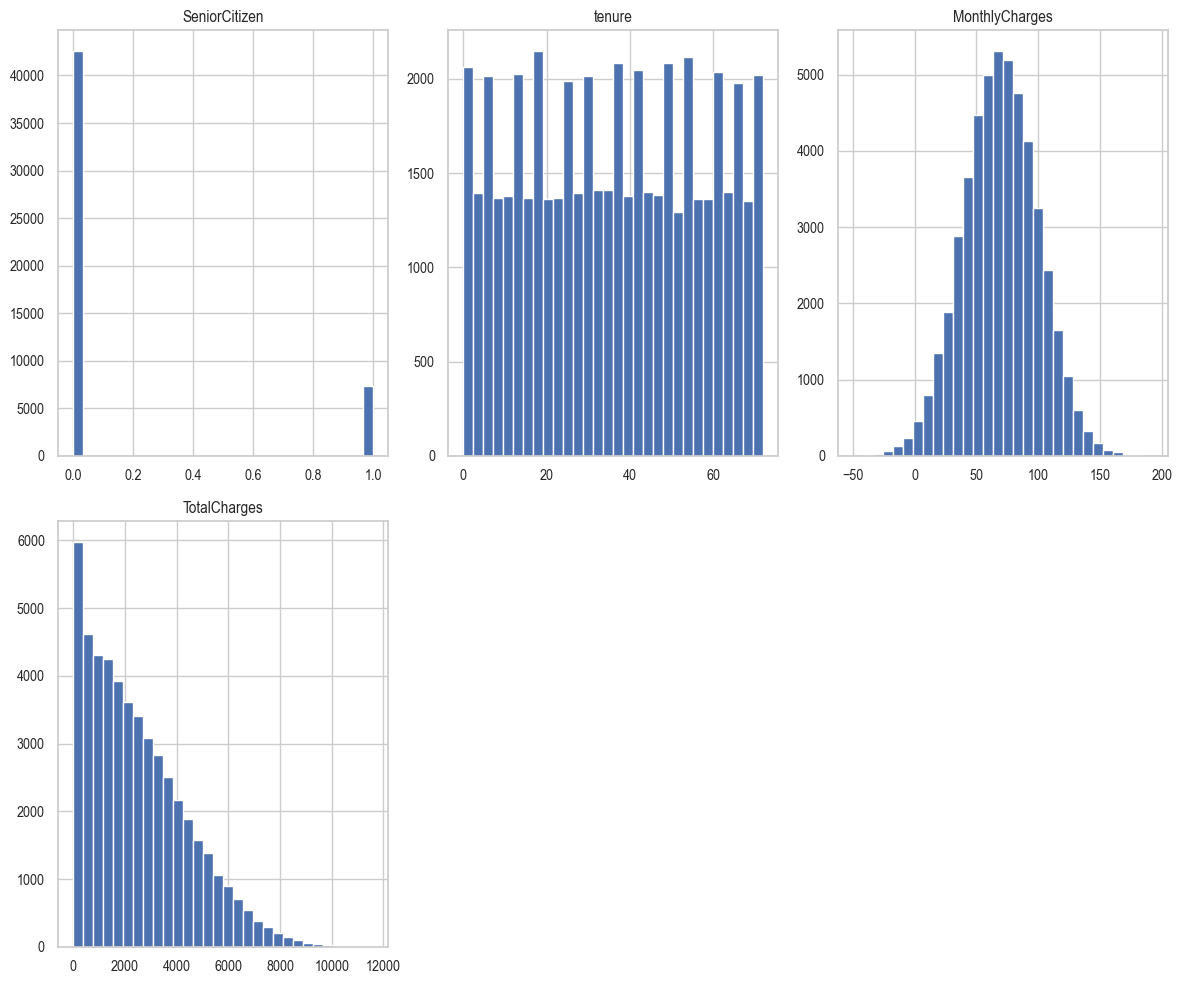

In [5]:
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=30, figsize=(12, 10), layout=(len(num_cols)//3+1, 3))
plt.tight_layout()
plt.show()

## 🧮 Categorical Value Counts

In [6]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f'\n{col} value counts:')
    print(df[col].value_counts())


customerID value counts:
CUST_00000    1
CUST_33350    1
CUST_33328    1
CUST_33329    1
CUST_33330    1
             ..
CUST_16668    1
CUST_16669    1
CUST_16670    1
CUST_16671    1
CUST_49999    1
Name: customerID, Length: 50000, dtype: int64

gender value counts:
Male      25046
Female    24954
Name: gender, dtype: int64

Partner value counts:
Yes    25111
No     24889
Name: Partner, dtype: int64

Dependents value counts:
No     25128
Yes    24872
Name: Dependents, dtype: int64

PhoneService value counts:
Yes    45035
No      4965
Name: PhoneService, dtype: int64

MultipleLines value counts:
No phone service    16736
Yes                 16673
No                  16591
Name: MultipleLines, dtype: int64

InternetService value counts:
DSL            16726
No             16672
Fiber optic    16602
Name: InternetService, dtype: int64

OnlineSecurity value counts:
No internet service    16842
Yes                    16688
No                     16470
Name: OnlineSecurity, dtype: int64



## ⚖️ Churn Distribution

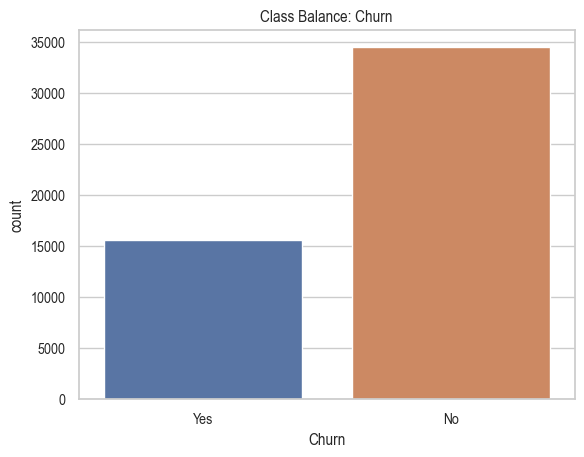

In [7]:
sns.countplot(data=df, x='Churn')
plt.title('Class Balance: Churn')
plt.show()

## 🔗 Correlation Matrix (Numerical Features)

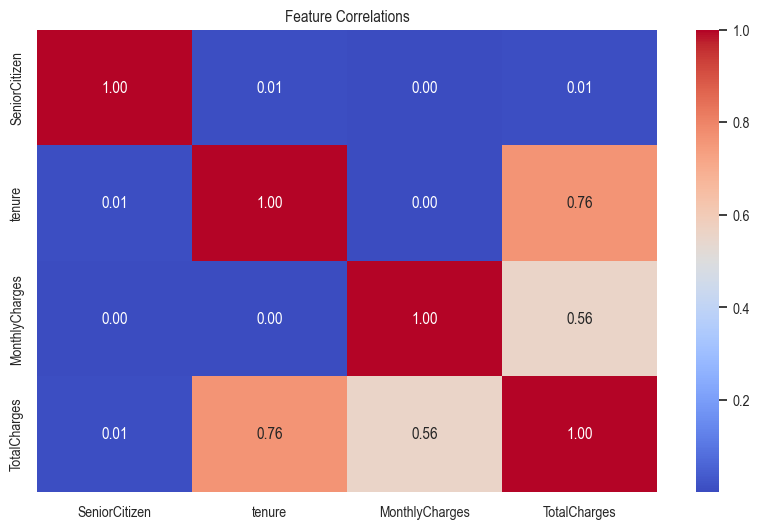

In [8]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

## 📈 Feature vs. Churn Comparison

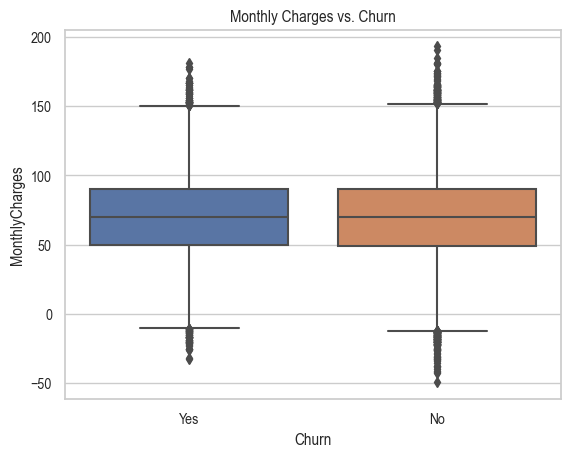

In [9]:
# Example: Monthly Charges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')
plt.show()

## 💾 Save Cleaned Dataset (optional)

In [10]:
# Example: Drop any rows with missing target or ID
clean_df = df.dropna(subset=['Churn'])

# Save for modeling
clean_df.to_csv('../data/processed/churn_clean.csv', index=False)